(-0.5, 511.5, 511.5, -0.5)

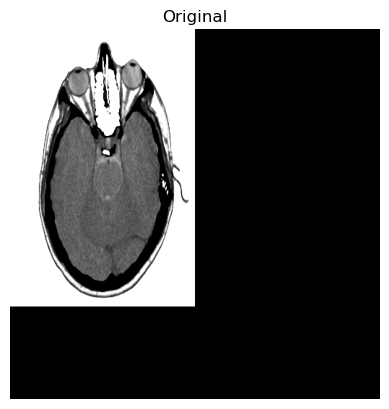

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# A
img = cv.imread("transformed.png", 0)

plt.figure()
plt.imshow(img, cmap="gray")
plt.title('Original')
plt.axis(False)
# scaling

2.0 1.3333333333333333


(-0.5, 1023.5, 1023.5, -0.5)

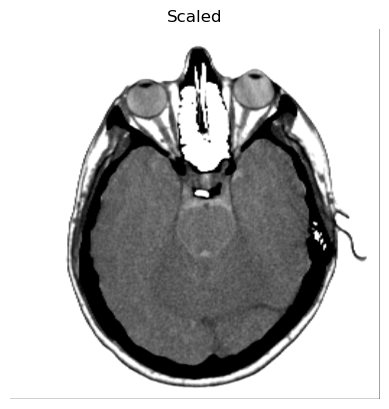

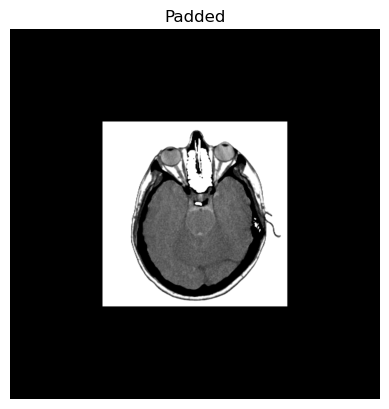

In [5]:
# B
for i in range(img.shape[0]):
    if (img[i, 0] == 0):
        n = i
        break
for j in range(img.shape[1]):
    if (img[0, j] == 0):
        m = j
        break

cy = img.shape[0] / n
cx = img.shape[1] / m
print(cx, cy)

SM = np.float32([[cx, 0, 0], [0, cy, 0]])
scaled = cv.warpAffine(img, SM, (img.shape))

plt.figure()
plt.imshow(scaled, cmap='gray')
plt.title('Scaled')
plt.axis(False)

x = scaled.shape[0]
y = scaled.shape[1]

image = cv.copyMakeBorder(scaled, x // 2, y // 2, x // 2, y // 2, cv.BORDER_CONSTANT, None, value=0)

plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Padded')
plt.axis(False)

(-0.5, 1023.5, 1023.5, -0.5)

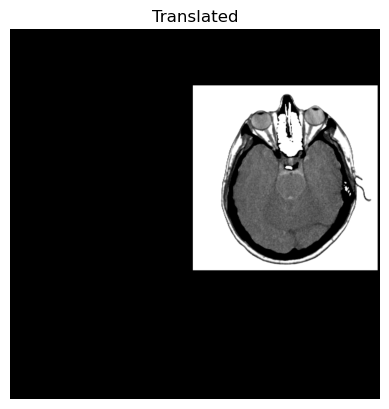

In [6]:
# C
x = image.shape[0]
y = image.shape[1]

TM = np.float32([[1, 0, 250], [0, 1, -100]])
translated = cv.warpAffine(image, TM, (x, y))

plt.figure()
plt.imshow(translated, cmap="gray")
plt.title('Translated')
plt.axis(False)

(-0.5, 1023.5, 1023.5, -0.5)

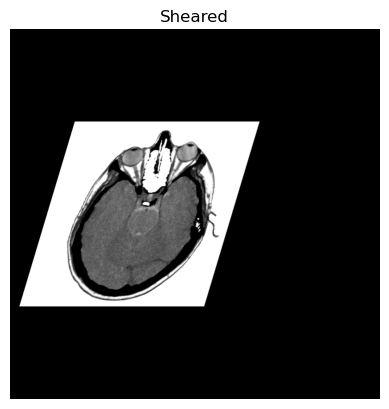

In [7]:
sv = 0
sh = -0.3
SM = np.float32([[1, sh, 0], [sv, 1, 0]])

sheared = cv.warpAffine(image, SM, (x, y))

plt.figure()
plt.imshow(sheared, cmap="gray")
plt.title('Sheared')
plt.axis(False)

[[ 0.93969262 -0.34202014  0.        ]
 [ 0.34202014  0.93969262  0.        ]]


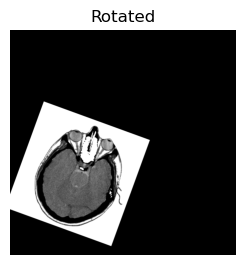

In [9]:
ang = -20
ang_rad = np.deg2rad(ang)
M = cv.getRotationMatrix2D((0, 0), ang, 1)
print(M)

backward_image = cv.warpAffine(image, M, image.shape[::-1])

plt.subplot(1, 2, 2)
plt.title('Rotated')
plt.imshow(backward_image, cmap='gray')
plt.axis(False)

plt.show()